In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Lets load the dataset
data = pd.read_csv("Japan_used_cars_datasets.csv")

In [3]:
# Check the shape of the dataset to understand its dimensions
print(data.shape)

(2318, 11)


In [4]:
data.head()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline


In [5]:
# Check for any null values in the dataset
print(data.isnull().sum())

id                 0
price              0
mark               0
model              0
year               0
mileage            0
engine_capacity    0
transmission       0
drive              0
hand_drive         0
fuel               0
dtype: int64


So we don't have any null value.

In [6]:
# Check for any duplicated rows in the dataset
print(data.duplicated().sum())

0


So we don't have any duplicate value

In [7]:
# Get a summary of the dataset, including the number of non-null values and data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2318 non-null   int64 
 1   price            2318 non-null   int64 
 2   mark             2318 non-null   object
 3   model            2318 non-null   object
 4   year             2318 non-null   int64 
 5   mileage          2318 non-null   int64 
 6   engine_capacity  2318 non-null   int64 
 7   transmission     2318 non-null   object
 8   drive            2318 non-null   object
 9   hand_drive       2318 non-null   object
 10  fuel             2318 non-null   object
dtypes: int64(5), object(6)
memory usage: 199.3+ KB
None


In [8]:
# Get a statistical summary of the dataset for numerical columns
data.describe()

,id,price,year,mileage,engine_capacity
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000
mean,1169.047023,971.522433,2005.972390,100013.194996,1507.010785
std,674.460724,288.673112,3.698863,52512.478883,549.585170
min,0.000000,80.000000,1979.000000,2000.000000,9.000000
25%,583.250000,776.000000,2004.000000,67000.000000,1300.000000
50%,1168.500000,1000.000000,2006.000000,94000.000000,1490.000000
75%,1753.750000,1213.000000,2009.000000,124000.000000,1800.000000
max,2335.000000,1400.000000,2015.000000,790000.000000,12340.000000


## EDA -> Exploratory Data Analysis

### Univariate Analysis

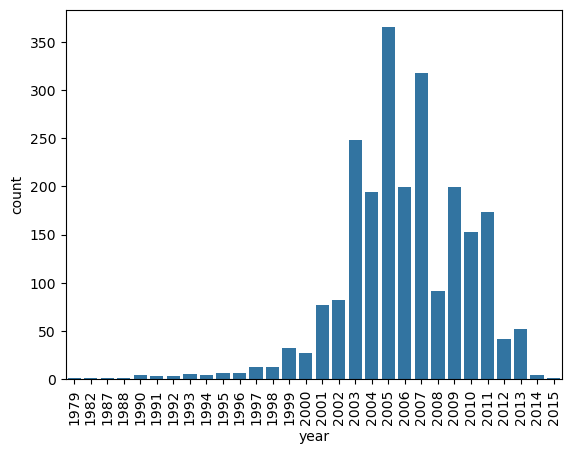

year
2005    365
2007    318
2003    248
2006    199
2009    199
2004    194
2011    173
2010    153
2008     91
2002     82
2001     77
2013     52
2012     42
1999     32
2000     27
1998     13
1997     13
1996      6
1995      6
1993      5
1994      4
2014      4
1990      4
1991      3
1992      3
1979      1
1982      1
2015      1
1987      1
1988      1
Name: count, dtype: int64

In [9]:
# Lets plot year
sns.countplot(x='year',data=data)
plt.xticks(rotation=90)
plt.show()
data['year'].value_counts()

Here we can see that in 2005 most of the car sold.

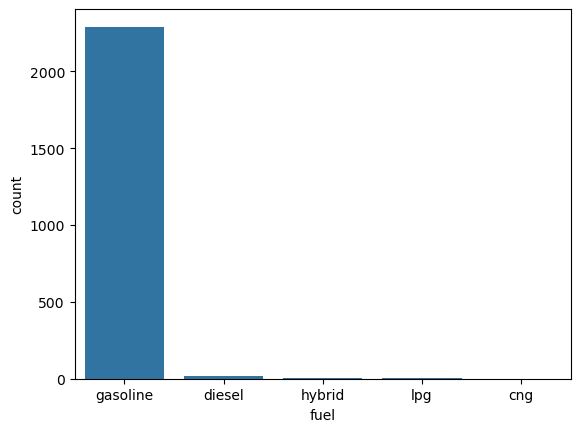

fuel
gasoline    2290
diesel        18
lpg            7
hybrid         2
cng            1
Name: count, dtype: int64

In [10]:
#Lets plot fuel
sns.countplot(x='fuel',data=data)
plt.show()
data['fuel'].value_counts()

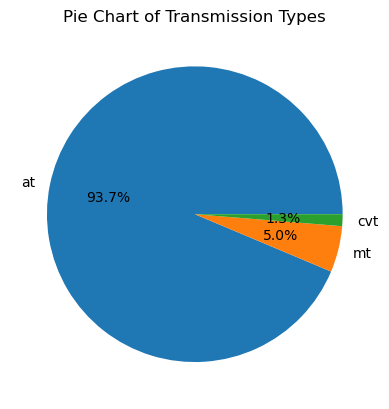

In [11]:
#Lets transmission type
data['transmission'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Pie Chart of Transmission Types')
plt.ylabel('')
plt.show()

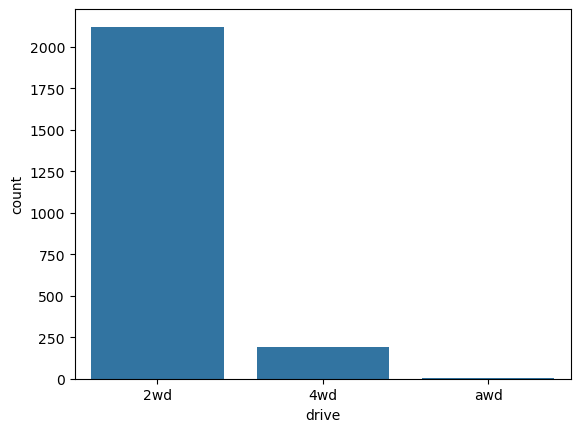

drive
2wd    2121
4wd     192
awd       5
Name: count, dtype: int64

In [12]:
#Lets drive type
sns.countplot(x='drive',data=data)
plt.show()
data['drive'].value_counts()

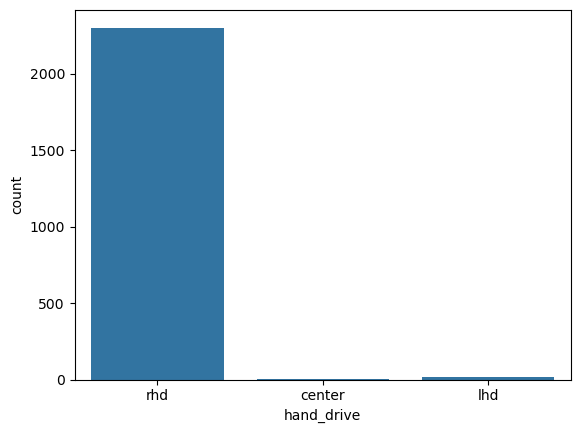

hand_drive
rhd       2301
lhd         16
center       1
Name: count, dtype: int64

In [13]:
#Lets hand_drive type
sns.countplot(x='hand_drive',data=data)
plt.show()
data['hand_drive'].value_counts()

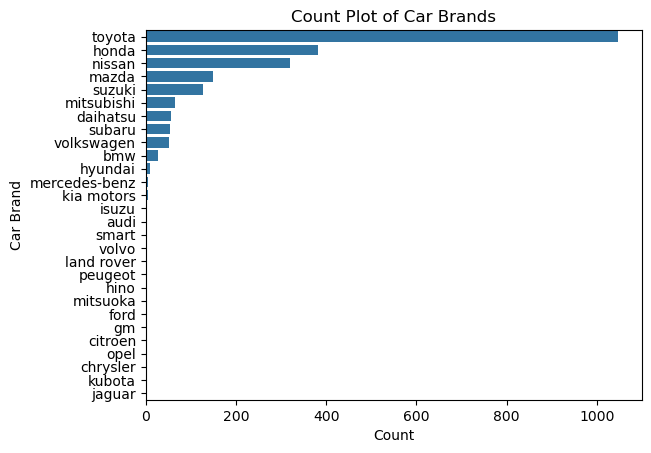

In [14]:
sns.countplot(y='mark', data=data, order=data['mark'].value_counts().index)
plt.title('Count Plot of Car Brands')
plt.xlabel('Count')
plt.ylabel('Car Brand')
plt.show()

### Bivariate Analysis

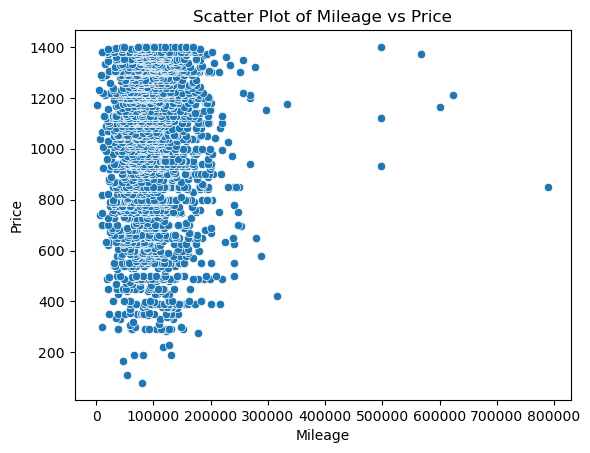

In [15]:
# Plotting mileage vs. price to see how the mileage of a car affects its price.
sns.scatterplot(x='mileage', y='price', data=data)
plt.title('Scatter Plot of Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

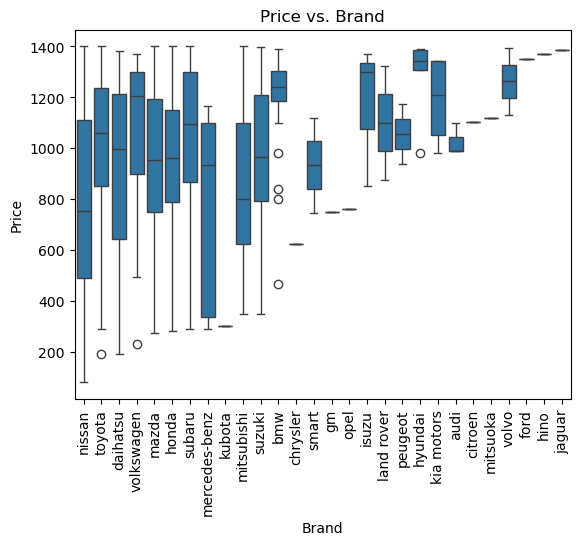

In [16]:
# We use a box plot to see how the car Brand affects the Price.
sns.boxplot(x='mark', y='price', data=data)
plt.title('Price vs. Brand')
plt.xticks(rotation=90)
plt.xlabel('Brand')
plt.ylabel('Price')
plt.show()

Here we can that the Brand name affects the car price.

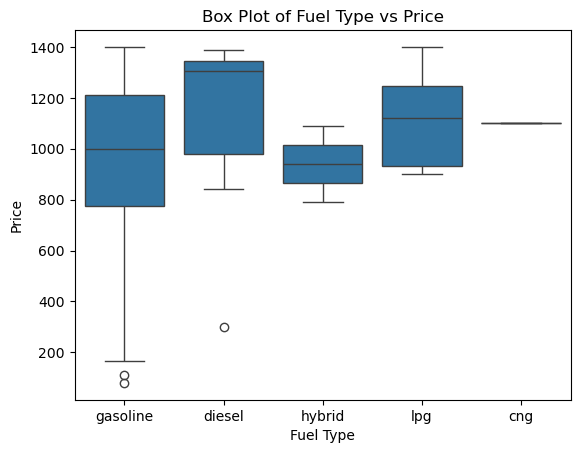

In [17]:
# Plotting fuel vs. price to compare car prices across different fuel types.
sns.boxplot(x='fuel', y='price', data=data)
plt.title('Box Plot of Fuel Type vs Price')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

Here we can see that diesel car is expensive.

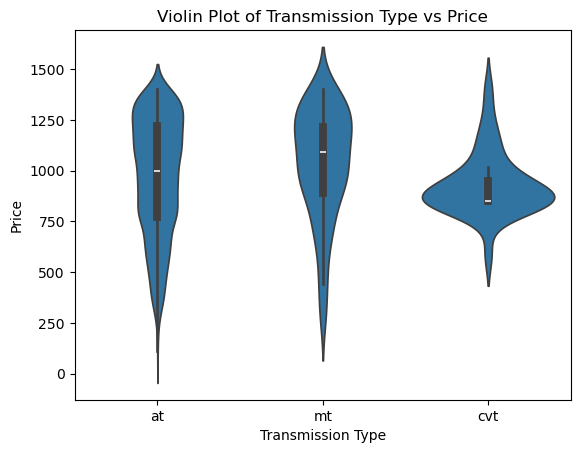

In [18]:
# Plotting transmission vs. price to compare prices based on transmission type.
sns.violinplot(x='transmission', y='price', data=data)
plt.title('Violin Plot of Transmission Type vs Price')
plt.xlabel('Transmission Type')
plt.ylabel('Price')
plt.show()

1. A wider section indicates more cars in that price range for a particular transmission type.
2. Here we can see that automatic transmission type car are more expensive.

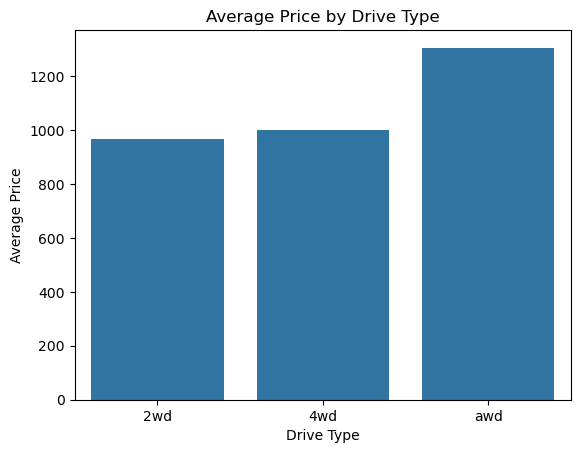

In [19]:
# Plotting the average price of cars by drive type.
avg_price_by_drive = data.groupby('drive')['price'].mean().reset_index()
sns.barplot(x='drive', y='price', data=avg_price_by_drive)
plt.title('Average Price by Drive Type')
plt.xlabel('Drive Type')
plt.ylabel('Average Price')
plt.show()

Here we can see that awd cars tend to be priced higher on average, possibly due to their better performance in certain conditions.

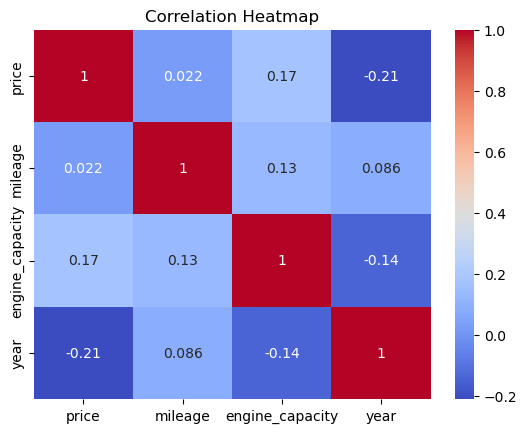

In [20]:
# Plotting the correlation matrix of price, mileage, engine_capacity, year.
corr_matrix = data[['price', 'mileage', 'engine_capacity', 'year']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Multivariate Analysis

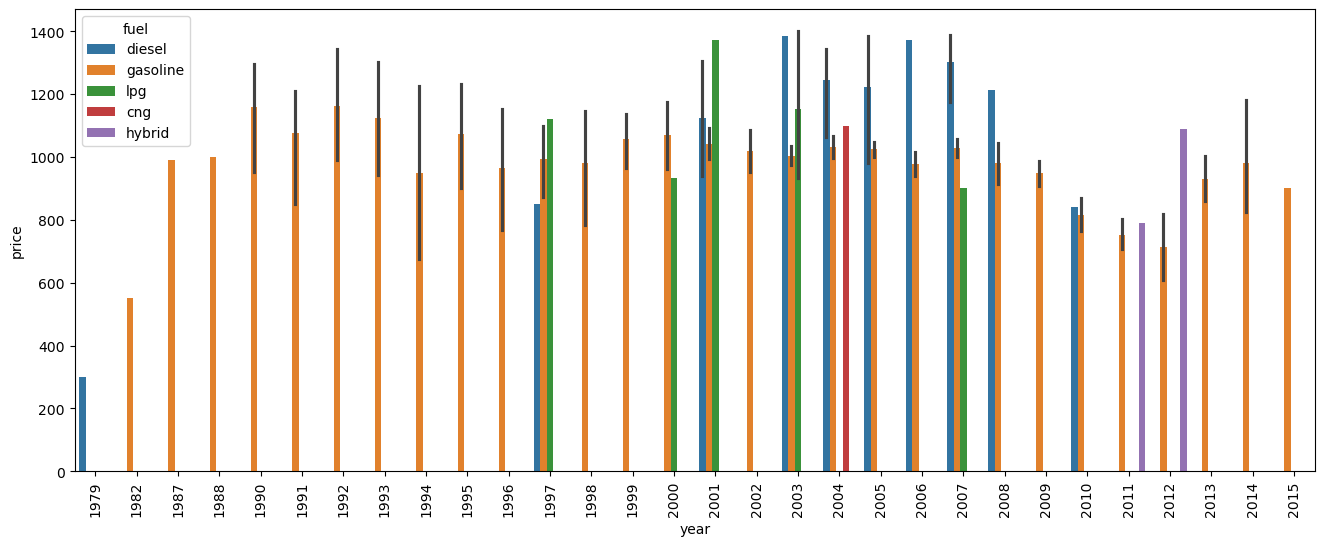

In [21]:
#Lets plot Year With Selling Price and Fuel
plt.figure(figsize=(16,6))
sns.barplot(y='price',x='year',hue='fuel',data=data)
plt.xticks(rotation=90)
plt.show()

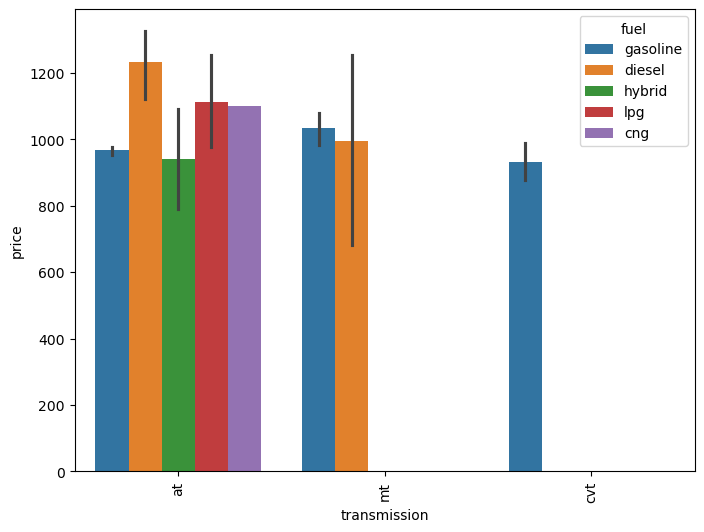

In [22]:
#Lets plot Year With transmission and Fuel
plt.figure(figsize=(8,6))
sns.barplot(x='transmission',y='price',hue='fuel',data=data)
plt.xticks(rotation=90)
plt.show()

Here we can see that in automatic all types of fuel car cars are available.

## Data PreProcessing

In [23]:
data.head()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline


In [24]:
# Droping unwanted columns
data = data.drop(['id'], axis=1)

In [25]:
data

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline
...,...,...,...,...,...,...,...,...,...,...
2313,1400,toyota,vitz,2009,121000,996,at,2wd,rhd,gasoline
2314,1400,toyota,estima,2003,101000,3000,at,2wd,rhd,gasoline
2315,1400,subaru,r2,2005,101000,660,cvt,2wd,rhd,gasoline
2316,1400,honda,z,2000,170000,660,at,4wd,rhd,gasoline


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   price            2318 non-null   int64 
 1   mark             2318 non-null   object
 2   model            2318 non-null   object
 3   year             2318 non-null   int64 
 4   mileage          2318 non-null   int64 
 5   engine_capacity  2318 non-null   int64 
 6   transmission     2318 non-null   object
 7   drive            2318 non-null   object
 8   hand_drive       2318 non-null   object
 9   fuel             2318 non-null   object
dtypes: int64(4), object(6)
memory usage: 181.2+ KB


In [27]:
#Lets Check for Outliers
#Select all numerical columns for ploting Distplot and Box plot
numeric = ['int64']

newdf = data.select_dtypes(include=numeric)
newdf

,price,year,mileage,engine_capacity
0,80,2003,80000,1240
1,110,2010,53000,1200
2,165,2005,47690,2000
3,190,2008,130661,1990
4,190,2006,66300,660
...,...,...,...,...
2313,1400,2009,121000,996
2314,1400,2003,101000,3000
2315,1400,2005,101000,660
2316,1400,2000,170000,660


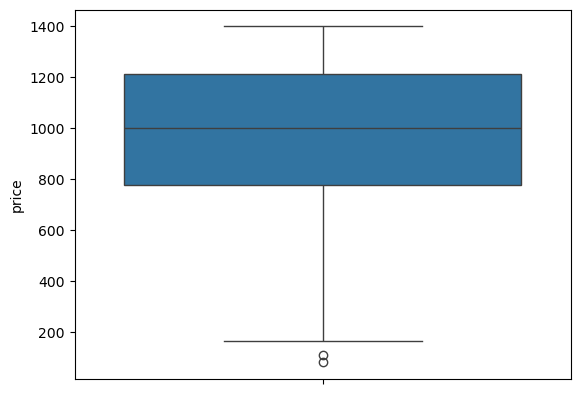

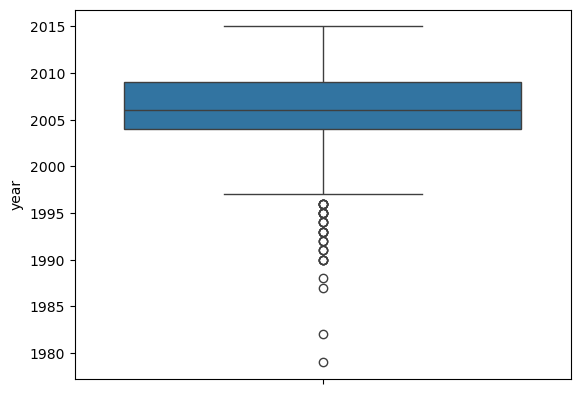

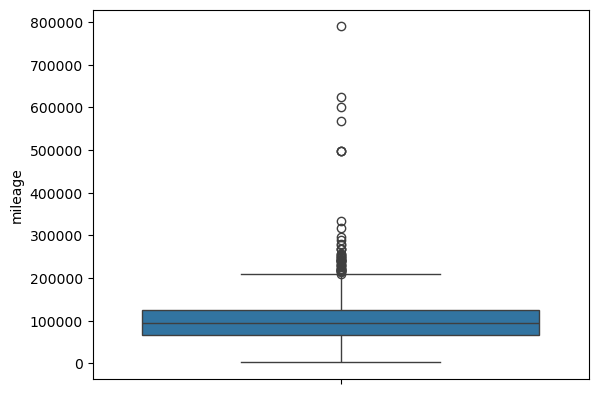

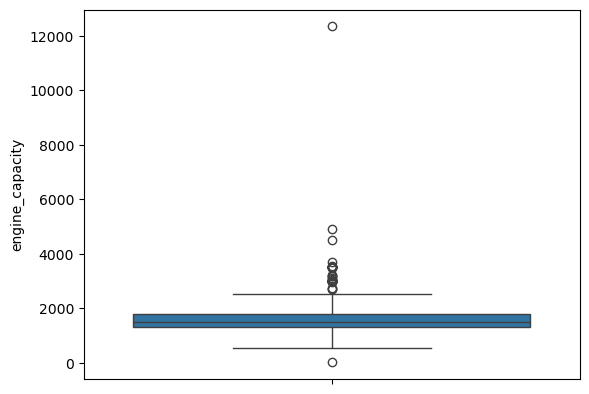

In [28]:
#Lets plot box plot
for i in newdf:
    plt.figure()
    sns.boxplot(y=newdf[i])
    plt.xticks(rotation=90)
    plt.show()

## Lets Remove Outliers

### 1. ZScore

In [29]:
import numpy as np
from scipy.stats import zscore

In [30]:
features = data[['price', 'year', 'mileage', 'engine_capacity']]

In [31]:
# Using zscore to remove outliers
z=np.abs(zscore(features))
z

,price,year,mileage,engine_capacity
0,3.089012,0.803769,0.381195,0.485945
1,2.985066,1.089113,0.895470,0.558743
2,2.794498,0.262946,0.996610,0.897214
3,2.707876,0.548289,0.583755,0.879015
4,2.707876,0.007466,0.642142,1.541515
...,...,...,...,...
2313,1.484621,0.818701,0.399740,0.930012
2314,1.484621,0.803769,0.018796,2.717161
2315,1.484621,0.262946,0.018796,1.541515
2316,1.484621,1.615004,1.333053,1.541515


In [32]:
df_zscore = data[(z < 3).all(axis=1)]

In [33]:
df_zscore

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline
5,190,daihatsu,mira,2004,81400,660,at,2wd,rhd,gasoline
...,...,...,...,...,...,...,...,...,...,...
2313,1400,toyota,vitz,2009,121000,996,at,2wd,rhd,gasoline
2314,1400,toyota,estima,2003,101000,3000,at,2wd,rhd,gasoline
2315,1400,subaru,r2,2005,101000,660,cvt,2wd,rhd,gasoline
2316,1400,honda,z,2000,170000,660,at,4wd,rhd,gasoline


In [34]:
# Shape of original dataset
data.shape

(2318, 10)

In [35]:
#After Removing Outliers
df_zscore.shape

(2262, 10)

In [36]:
print(f"Data loss using Z-score method: {data.shape[0] - df_zscore.shape[0]}")

Data loss using Z-score method: 56


### 2. IQR (Inter Quantile Range) method

In [37]:
Q1 = features.quantile(0.25)
Q3 = features.quantile(0.75)
IQR = Q3 - Q1

df_iqr = features[~((features < (Q1 - 1.5 * IQR)) |(features > (Q3 + 1.5 * IQR))).any(axis=1)]

In [38]:
df_iqr

,price,year,mileage,engine_capacity
2,165,2005,47690,2000
3,190,2008,130661,1990
4,190,2006,66300,660
5,190,2004,81400,660
6,220,2010,117000,1200
...,...,...,...,...
2311,1400,2005,101874,2000
2312,1400,2007,112000,1300
2313,1400,2009,121000,996
2315,1400,2005,101000,660


In [39]:
# Shape of original dataset
data.shape

(2318, 10)

In [40]:
#After Removing Outliers
df_iqr.shape

(2197, 4)

In [41]:
print(f"Data loss using IQR method: {data.shape[0] - df_iqr.shape[0]}")

Data loss using IQR method: 121


So, in IQR Method we can see that we lost 121 rows. Lets move foreward with Z score if we dont get better result with Z Score Method then we choose IQR Method.

## Encoding the categorical columns using Label Encoding

In [42]:
# Encode categorical columns using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in df_zscore.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df_zscore[column] = label_encoders[column].fit_transform(df_zscore[column])

In [43]:
df_zscore

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
1,110,17,133,2010,53000,1200,0,0,1,2
2,165,17,124,2005,47690,2000,0,0,1,2
3,190,23,28,2008,130661,1990,0,0,1,2
4,190,4,143,2006,66300,660,0,0,1,2
5,190,4,143,2004,81400,660,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...
2313,1400,23,230,2009,121000,996,0,0,1,2
2314,1400,23,91,2003,101000,3000,0,0,1,2
2315,1400,21,183,2005,101000,660,1,0,1,2
2316,1400,7,243,2000,170000,660,0,1,1,2


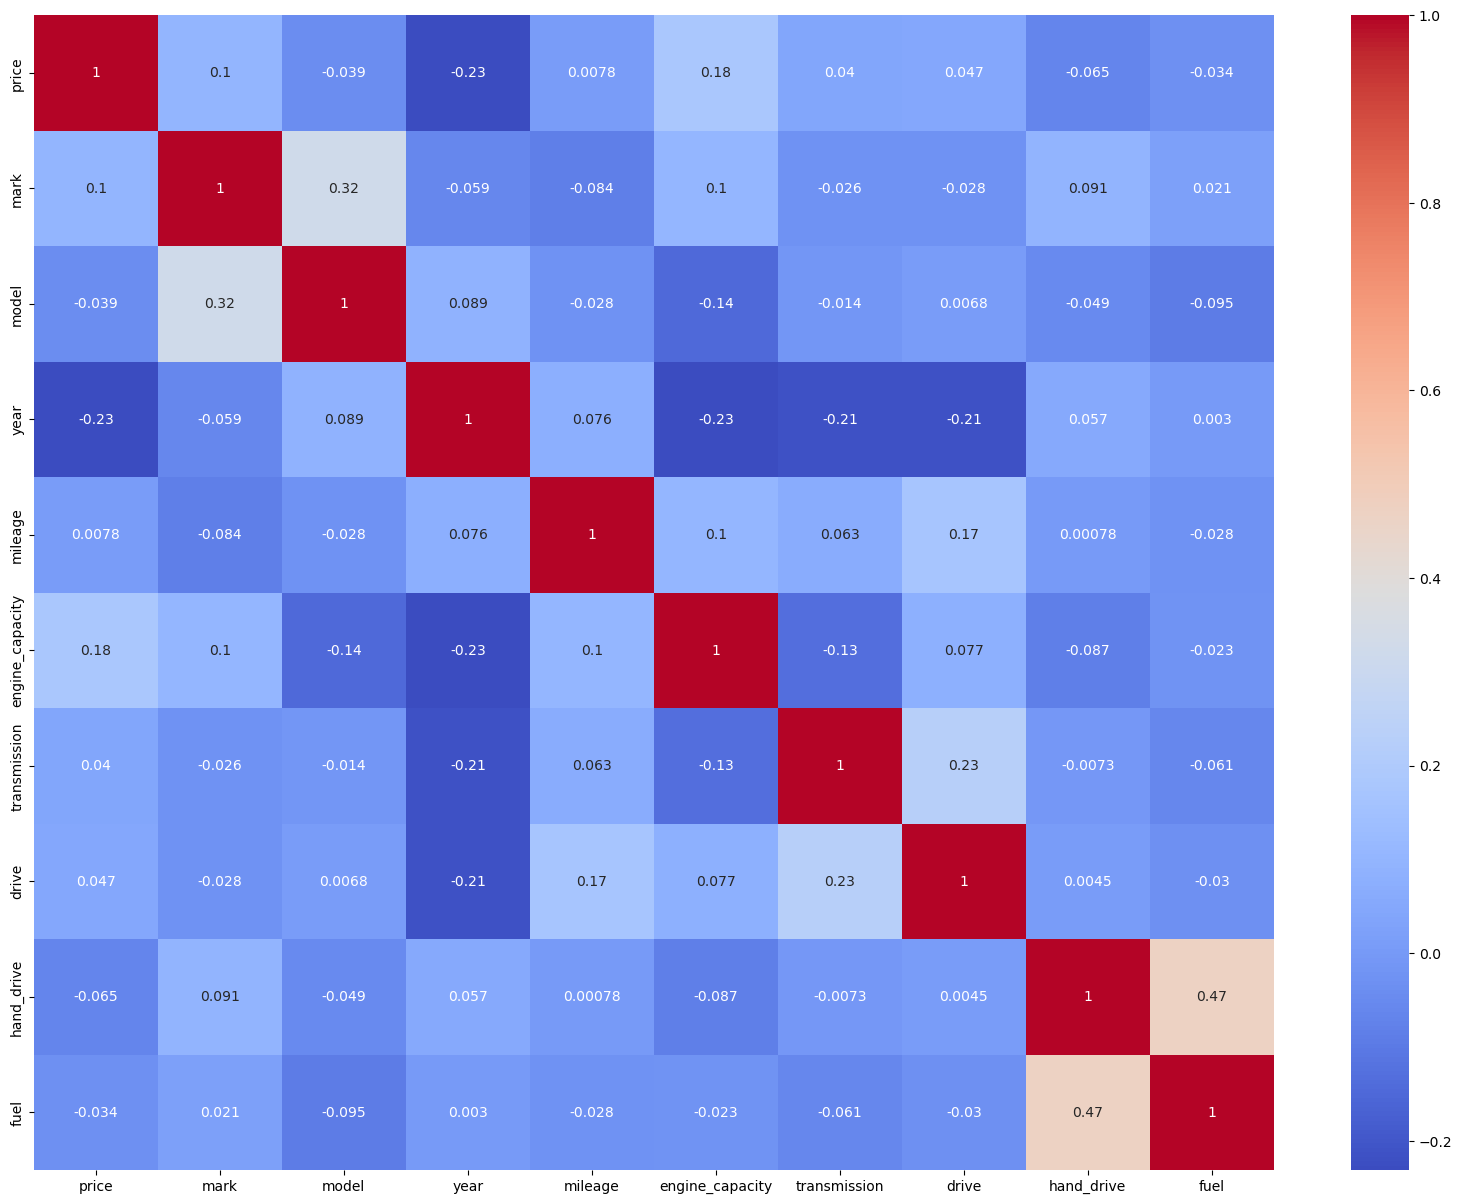

In [44]:
# Check the correlation between features and target variable, and visualize using a heatmap
corr_matrix = df_zscore.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

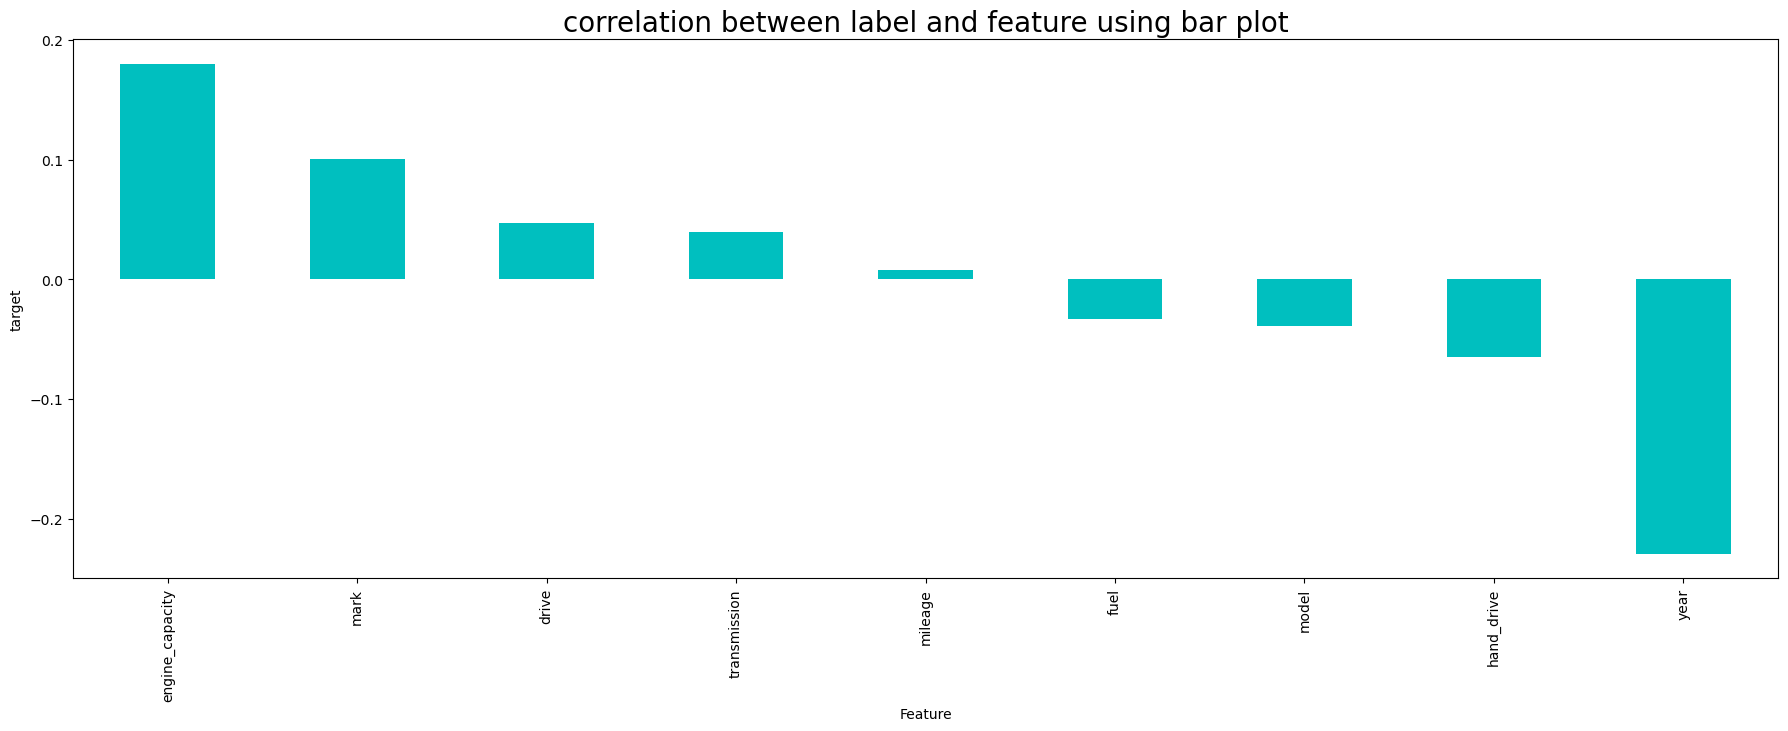

In [45]:
plt.figure(figsize=(22,7))
df_zscore.corr()['price'].sort_values(ascending=False).drop(['price']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

## Model Building

In [46]:
x = df_zscore.drop(columns=['price'])
y = df_zscore.price

In [47]:
#Lets check for the shape of the x
x.shape

(2262, 9)

In [48]:
#Lets check for the shape of y
y.shape

(2262,)

## Checking for skewness

In [49]:
# Check for skewness and apply transformations if needed
x.skew()

mark               -0.891209
model              -0.227651
year               -0.143756
mileage             0.601181
engine_capacity     0.607818
transmission        4.212776
drive               3.333863
hand_drive        -12.165646
fuel                2.400797
dtype: float64

In [50]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [51]:
pt.fit_transform(x)

array([[-0.32907868, -0.08466299,  1.16159072, ..., -0.29491934,
         0.08170415,  0.02486769],
       [-0.32907868, -0.22222394, -0.36152605, ..., -0.29491934,
         0.08170415,  0.02486769],
       [ 0.84574664, -1.73171183,  0.53867105, ..., -0.29491934,
         0.08170415,  0.02486769],
       ...,
       [ 0.41806198,  0.67231296, -0.36152605, ..., -0.29491934,
         0.08170415,  0.02486769],
       [-1.55933022,  1.56794121, -1.77497058, ...,  3.3907572 ,
         0.08170415,  0.02486769],
       [ 0.84574664, -0.71542592, -0.36152605, ..., -0.29491934,
         0.08170415,  0.02486769]])

## Feature Scaling

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [53]:
x_scaler

array([[-0.10981305, -0.098294  ,  1.15067023, ..., -0.29092489,
         0.08170415,  0.02420349],
       [-0.10981305, -0.23649894, -0.33869579, ..., -0.29092489,
         0.08170415,  0.02420349],
       [ 0.78854905, -1.71068492,  0.55492382, ..., -0.29092489,
         0.08170415,  0.02420349],
       ...,
       [ 0.48909502,  0.6695112 , -0.33869579, ..., -0.29092489,
         0.08170415,  0.02420349],
       [-1.60708322,  1.59087744, -1.82806181, ...,  3.24709712,
         0.08170415,  0.02420349],
       [ 0.78854905, -0.72789427, -0.33869579, ..., -0.29092489,
         0.08170415,  0.02420349]])

## Checking VIF- Variance Inflation Factor values

In [54]:
#Lets check VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Score'] = [variance_inflation_factor(x_scaler,i) for i in range(x_scaler.shape[1])]
vif['features'] = x.columns
vif

,Score,features
0,1.183166,mark
1,1.188354,model
2,1.195452,year
3,1.073293,mileage
4,1.179190,engine_capacity
5,1.144746,transmission
6,1.130224,drive
7,1.312991,hand_drive
8,1.295940,fuel


In our model there is no multicollinearty problem.

## Lets Build Model

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

In [56]:
# Find the best random state by training a model multiple times and checking the R^2 score
best_r2 = 0
best_random_state = 0
for i in range(10, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.3, random_state=i)
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    if r2 > best_r2:
        best_r2 = r2
        best_random_state = i

print(f'Best Random State: {best_random_state}, Best R^2 Score: {best_r2}')

Best Random State: 517, Best R^2 Score: 0.11480732471976252


## Splitting the data into train and test

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.3, random_state=517)

## Train the Model

In [58]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [59]:
y_pred = lr.predict(x_test)
print(f'Linear Regression R^2 Score: {r2_score(y_test, y_pred)}')

Linear Regression R^2 Score: 0.11480732471976252


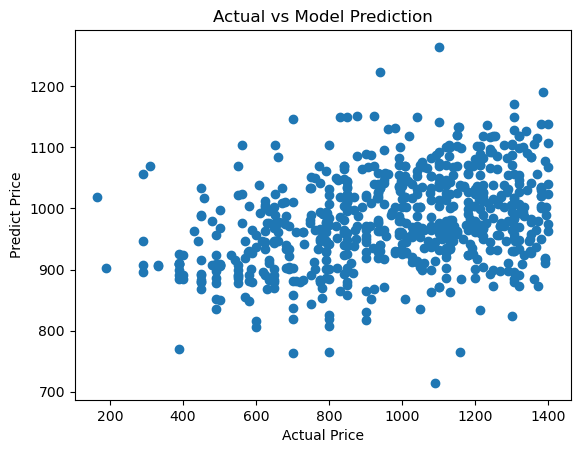

In [60]:
# Comparing the predicted data with the actual data
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predict Price')
plt.title('Actual vs Model Prediction')
plt.show()

In [61]:
# Accuracy score
print("Model Training Score : ",lr.score(x_train,y_train))
print("Model Testing Score : ",lr.score(x_test,y_test))

Model Training Score :  0.06189263299183312
Model Testing Score :  0.11480732471976252


In [62]:
#MAE
mean_absolute_error(y_test,y_pred)

217.15085350044944

In [63]:
#MSE
mean_squared_error(y_test,y_pred)

68058.1898554898

In [64]:
# Cross-Validation
cv_scores = cross_val_score(lr, x_train, y_train, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')

Cross-Validation Scores: [0.04627349 0.06961918 0.0119702  0.03949414 0.07860815]


## Lets do Hyperparameter Tuning

In [65]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [66]:
lasscv = LassoCV(alphas = None , max_iter =100)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100)

In [67]:
alpha = lasscv.alpha_
alpha

3.706953883813687

In [68]:
#Now that we have best parameter,Lets use Lasso regression and see how well our data has fitted before
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=3.706953883813687)

In [69]:
lasso_reg.score(x_test,y_test)

0.11171728517469315

We can see that we are getting the almost same score so our model is not overfitted. But let's try Ridge.

In [70]:
ridge = RidgeCV(alphas=np.arange(0.1, 10, 0.1), cv=5)
ridge.fit(x_train, y_train)
print(f'Best Ridge Alpha: {ridge.alpha_}')

Best Ridge Alpha: 9.9


In [71]:
ridge.score(x_test, y_test)

0.11475165735892512

We got around same R2 using ridge as well .So its safe to say there is no overfitting.

## Save the Model with Pickle

In [72]:
import pickle
filename=('Japan Used Cars Price Prediction')
pickle.dump(lr,open(filename,'wb'))

In [73]:
lr_model = pickle.load(open('Japan Used Cars Price Prediction','rb'))

In [74]:
x.head()

,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
1,17,133,2010,53000,1200,0,0,1,2
2,17,124,2005,47690,2000,0,0,1,2
3,23,28,2008,130661,1990,0,0,1,2
4,4,143,2006,66300,660,0,0,1,2
5,4,143,2004,81400,660,0,0,1,2


In [75]:
lr_model.predict(scaler.transform([[17,133,2010,53000,1200,0,0,1,2]]))

array([894.0941066])